In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# Global consts for fluid flow
prandtl_number = 10 # ratio of momentum diffusivity and thermal diffusivity
rayleigh_number = 28 # it is the measure of instability in a fluid, mainly caused by convection
beta = 8/3 # measure of compressibility of a fluid ( relative volume change )
# refer "https://mathworld.wolfram.com/LorenzAttractor.html" for complete formulaic breakdown
def lorenzAttractorGenerator(x,y,z):
    # This method of fluid movement, essentially assumes that the fluid is cooled from below and heated from above
    xBar = prandtl_number * (y-x)
    yBar = rayleigh_number * x - y - x*y
    zBar = x * y - beta * z
    return xBar, yBar, zBar

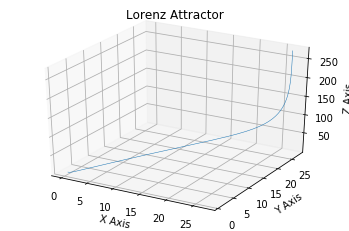

In [6]:
if __name__ == "__main__":
    dt = 0.01
    steps = 100000
    xArr = np.empty(steps + 1)
    yArr = np.empty(steps + 1)
    zArr = np.empty(steps + 1)
    xArr[0], yArr[0], zArr[0] = (0., 1., 1.05)
    for i in range(steps):
        xBar, yBar, zBar = lorenzAttractorGenerator(xArr[i], yArr[i], zArr[i])
        xArr[i + 1] = xArr[i] + (xBar * dt)
        yArr[i + 1] = yArr[i] + (yBar * dt)
        zArr[i + 1] = zArr[i] + (zBar * dt)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(xArr, yArr, zArr, lw=0.5)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title("Lorenz Attractor")
    plt.show()
    pass


